In [1]:
import pandas as pd    #use for data managing
import numpy as np     #use for powerful calculation, when images data will be stored in arrays we will perform calculation using this
import cv2             #computer vision library, used for analysis of images.
import os               #for interacting with operating system
from random import shuffle #random library used to deal with random number, shuffle function is used for shuffling items in list or conatiner.
from tqdm import tqdm #tqdm used for displaying the progress bar of a loop.
import random       #refer above 
from PIL import Image  #image library used for image operations.
from tensorflow.keras.preprocessing import image #tensorflow is ml library, keras is library for neural networks, preprocessing is submodule used for preprocess images
import matplotlib.pyplot as plt #matplotlib used for plotting data
from tensorflow.keras.utils import to_categorical  #keras.utils ->  utilities for working with neural networks, including data preprocessing, to_categorical -> class labels into a binary matrix representation
from tensorflow.keras.models import Sequential #Sequential class is a linear stack of layers that allows for the easy construction of a neural network model layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  #these are all layers used in cnn.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau #perform various actions during training,
from random import shuffle #refer above
from tensorflow.keras.preprocessing.image import ImageDataGenerator #apply various transformations to input images, such as rotation, zooming, shifting, 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # pre-trained deep learning model for image classification tasks. 
from tensorflow.keras import Model, layers #importing model and layers
from numpy import loadtxt #use for loading data from a text file

import itertools #provide efficient tools for iterable
from sklearn.metrics import confusion_matrix, classification_report #or various tasks, including classification, regression, clustering, and more.

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions #preprocess input images #raw prediction output  into human-readable class labels.
from tensorflow.keras.models import load_model #helps in loading model
from tensorflow.keras.preprocessing import image #refer above




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading images

In [3]:
B_DIR = "/content/drive/MyDrive/skin_cancer_dataset/bcc/train"
M_DIR = "/content/drive/MyDrive/skin_cancer_dataset/melanoma/train"
N_DIR = "/content/drive/MyDrive/skin_cancer_dataset/nv/train"


Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)

sample images

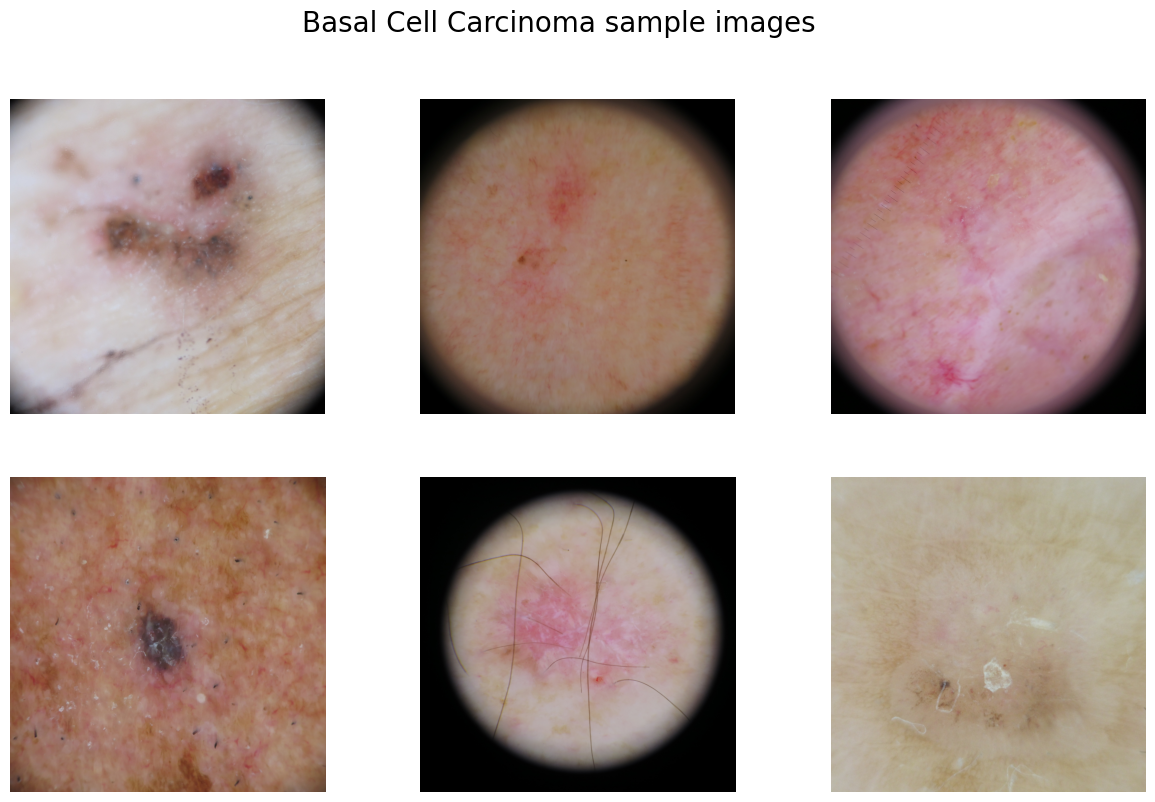

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Assuming Bimages is a list of image filenames

# Set the path to your image directory
image_dir = "/content/drive/MyDrive/skin_cancer_dataset/bcc/train"

# Full path for each image
image_paths = [os.path.join(image_dir, image_name) for image_name in Bimages]

# Randomly sample 6 images
sample_images = random.sample(image_paths, 6)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(6):
    # Read the image using cv2.imread
    im = cv2.imread(sample_images[i])

    # Check if the image is successfully loaded
    if im is not None:
        # Display the image
        ax[i // 3, i % 3].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Error loading image: {sample_images[i]}")

# Adjust layout and show the plot
fig.suptitle("Basal Cell Carcinoma sample images", fontsize=20)
plt.show()


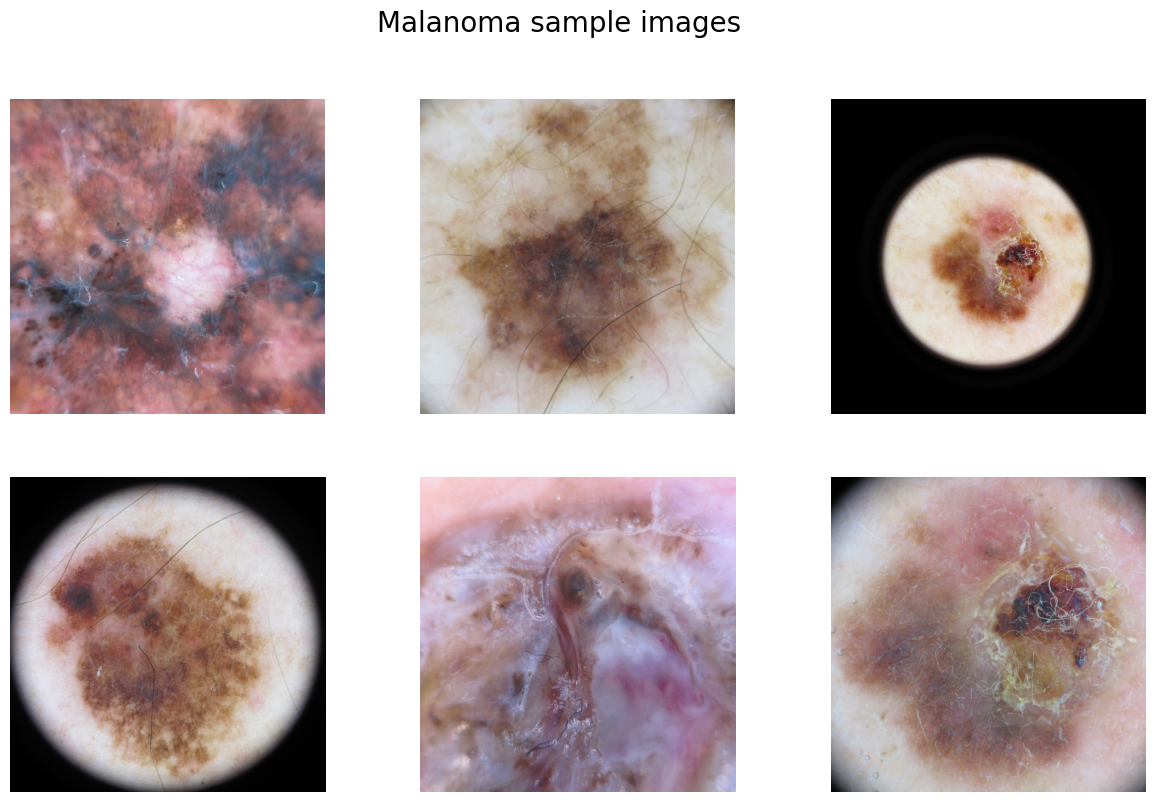

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Assuming Bimages is a list of image filenames

# Set the path to your image directory
image_dir = "/content/drive/MyDrive/skin_cancer_dataset/melanoma/train"

# Full path for each image
image_paths = [os.path.join(image_dir, image_name) for image_name in Mimages]

# Randomly sample 6 images
sample_images = random.sample(image_paths, 6)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(6):
    # Read the image using cv2.imread
    im = cv2.imread(sample_images[i])

    # Check if the image is successfully loaded
    if im is not None:
        # Display the image
        ax[i // 3, i % 3].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Error loading image: {sample_images[i]}")

# Adjust layout and show the plot
fig.suptitle("Malanoma sample images", fontsize=20)
plt.show()


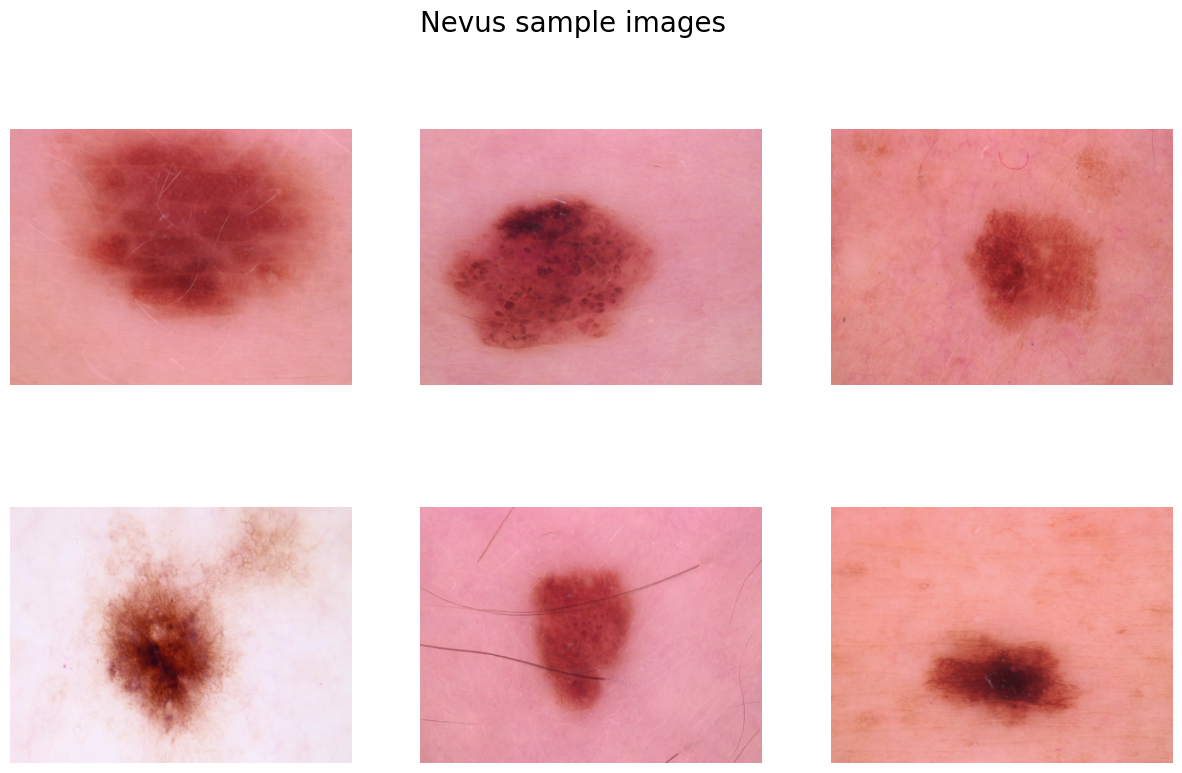

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Assuming Bimages is a list of image filenames

# Set the path to your image directory
image_dir = "/content/drive/MyDrive/skin_cancer_dataset/nv/train"

# Full path for each image
image_paths = [os.path.join(image_dir, image_name) for image_name in Nimages]

# Randomly sample 6 images
sample_images = random.sample(image_paths, 6)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(6):
    # Read the image using cv2.imread
    im = cv2.imread(sample_images[i])

    # Check if the image is successfully loaded
    if im is not None:
        # Display the image
        ax[i // 3, i % 3].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        ax[i // 3, i % 3].axis('off')
    else:
        print(f"Error loading image: {sample_images[i]}")

# Adjust layout and show the plot
fig.suptitle("Nevus sample images", fontsize=20)
plt.show()


data prepare loading images and labels

In [7]:
import os
import cv2
import numpy as np
from PIL import Image

data = []
labels = []

# Define directories
directories = [
    ("/content/drive/MyDrive/skin_cancer_dataset/bcc/train", 0),
    ("/content/drive/MyDrive/skin_cancer_dataset/melanoma/train", 1),
    ("/content/drive/MyDrive/skin_cancer_dataset/nv/train", 2)
]

for directory, label in directories:
    images = os.listdir(directory)
    for image_filename in images:
        try:
            image_path = os.path.join(directory, image_filename)
            image = cv2.imread(image_path)
            image_from_array = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            size_image = image_from_array.resize((224, 224))
            data.append(np.array(size_image))
            labels.append(label)
        except Exception as e:
            print(f"Error processing image {image_filename}: {e}")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (2838, 224, 224, 3)
Labels shape: (2838,)


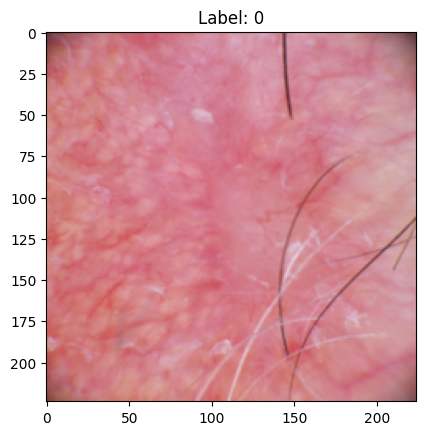

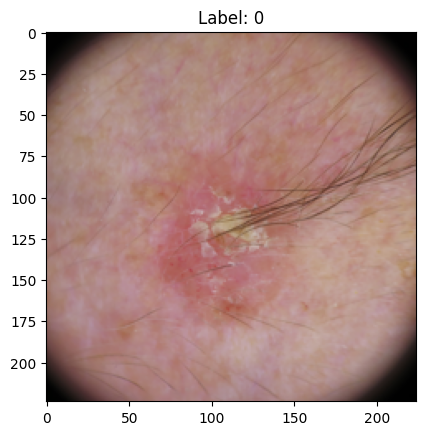

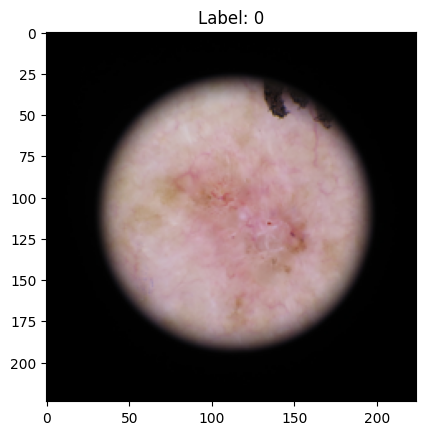

In [8]:
import matplotlib.pyplot as plt

# Visualize a few images
for i in range(3):
    plt.imshow(data[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()


In [9]:
feats = np.array(data)
labels = np.array(labels)

np.save("/content/drive/MyDrive/skin_cancer_dataset/feats_train",feats)
np.save("/content/drive/MyDrive/skin_cancer_dataset/labels_train", labels)

loading saved data and labels

In [10]:
feats = np.load("/content/drive/MyDrive/skin_cancer_dataset/feats_train.npy")
labels = np.load("/content/drive/MyDrive/skin_cancer_dataset/labels_train.npy")

Randomizing Data Labels

In [11]:
s = np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]

In [12]:
num_classes = len(np.unique(labels))
len_data = len(feats)
print(len_data)

2838


In [13]:
print(num_classes)

3


train test split

In [14]:
(x_train, x_test) = feats[(int)(0.2*len_data):], feats[:(int)(0.2*len_data)]
(y_train, y_test) = labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]


Image data normalization

In [15]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len = len(x_train)
test_len = len(x_test)

In [16]:
y_train = to_categorical(y_train,3)
y_test=to_categorical(y_test, 3)

image augmentation

In [17]:
trainAug = ImageDataGenerator(
featurewise_center = False,
          samplewise_center=False,
          featurewise_std_normalization=False,
          samplewise_std_normalization=False,
          zca_whitening=False,
          rotation_range=10,
          zoom_range = 0.1,
          width_shift_range = 0.1,
          height_shift_range = 0.1,
          horizontal_flip=False,
          vertical_flip=False)



Model building

In [18]:
conv_base = MobileNetV2(
    include_top = False,
    input_shape = (224, 224, 3),
    weights = 'imagenet')

for layer in conv_base.layers:
  layer.trainable = True


9406464/9406464 [==============================] - 0s 0us/step


In [19]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [20]:
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', verbose = 1, save_best_only = True ),
             ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, verbose = 1, mode = 'min', min_lr = 0.00000000001 )]

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
BS = 64
print("[INFO] training head...")
H = model.fit(
    trainAug.flow(x_train, y_train, batch_size = BS),
    steps_per_epoch = train_len //BS,
    validation_data = (x_test, y_test),
    validation_steps = test_len // BS,
    epochs = 30, callbacks = callbacks)


[INFO] training head...
Epoch 1/30
35/35 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.8074
Epoch 1: val_loss improved from inf to 5.26466, saving model to .mdl_wts.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


35/35 [==============================] - 77s 1s/step - loss: 0.4752 - accuracy: 0.8074 - val_loss: 5.2647 - val_accuracy: 0.5379 - lr: 0.0010
Epoch 2/30
35/35 [==============================] - ETA: 0s - loss: 0.2440 - accuracy: 0.9053
Epoch 2: val_loss improved from 5.26466 to 2.82548, saving model to .mdl_wts.hdf5
35/35 [==============================] - 34s 976ms/step - loss: 0.2440 - accuracy: 0.9053 - val_loss: 2.8255 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 3/30
35/35 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.9338
Epoch 3: val_loss did not improve from 2.82548
35/35 [==============================] - 33s 927ms/step - loss: 0.1907 - accuracy: 0.9338 - val_loss: 4.3913 - val_accuracy: 0.4480 - lr: 0.0010
Epoch 4/30
35/35 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9470
Epoch 4: val_loss did not improve from 2.82548

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
35/35 [==========================

saving and loading model

In [22]:
model = load_model('.mdl_wts.hdf5')
model.save('/content/drive/MyDrive/skin_model/model_v1.h5')

In [23]:
model = load_model('/content/drive/MyDrive/skin_model/model_v1.h5')
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_accuracy:-', accuracy[1])

18/18 [==============================] - 4s 99ms/step - loss: 1.4094 - accuracy: 0.7937

 Test_accuracy:- 0.7936508059501648


In [24]:
rounded_predictions = model.predict(x_test, batch_size = 16, verbose = 0)
rounded_predictions[1]

array([0.89170957, 0.0805164 , 0.02777409], dtype=float32)

36/36 [==============================] - 1s 26ms/step


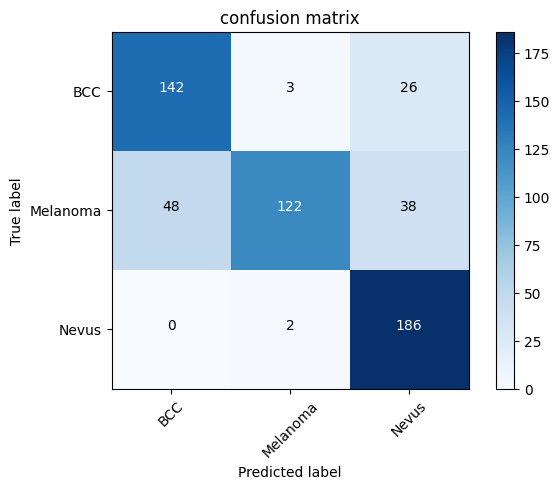

In [25]:
pred = np.argmax(rounded_predictions, axis=1)
rounded_labels = np.argmax(y_test, axis=1)

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
BS = 16
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  target_names = ['BCC', 'Melanoma', 'Nevus']
  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
            horizontalalignment = "center",
            color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Y_pred = model.predict(x_test, batch_size=BS)
Y_pred_classes = np.argmax(pred_Y, axis=1)
rounded_labels = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(3))


In [26]:
predIdxs = model.predict(x_test, batch_size = BS)

predIdxs = np.argmax(predIdxs, axis = 1)
rounded_labels = np.argmax(y_test, axis = 1)
print(classification_report(rounded_labels, predIdxs, target_names = ['BCC', 'Melanoma', 'Nevus']))


36/36 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

         BCC       0.75      0.83      0.79       171
    Melanoma       0.96      0.59      0.73       208
       Nevus       0.74      0.99      0.85       188

    accuracy                           0.79       567
   macro avg       0.82      0.80      0.79       567
weighted avg       0.82      0.79      0.79       567



plotting roc auc

36/36 [==============================] - 1s 22ms/step


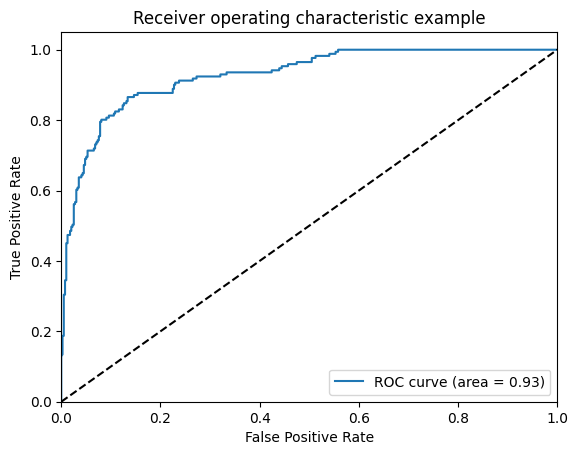

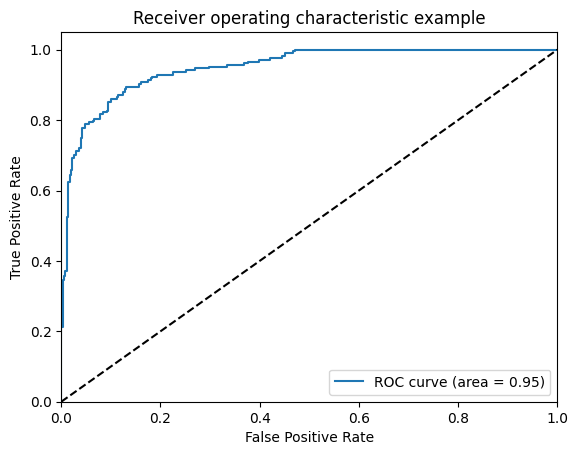

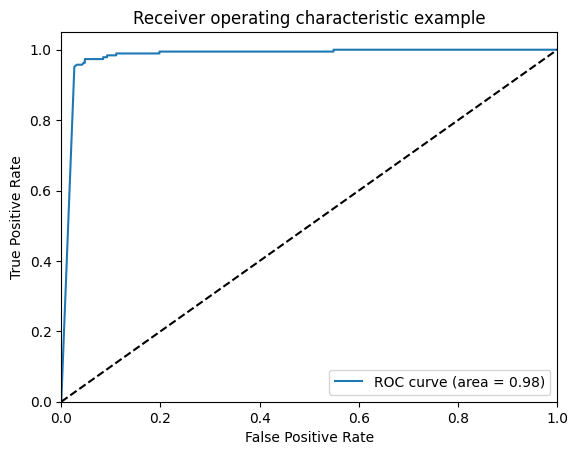

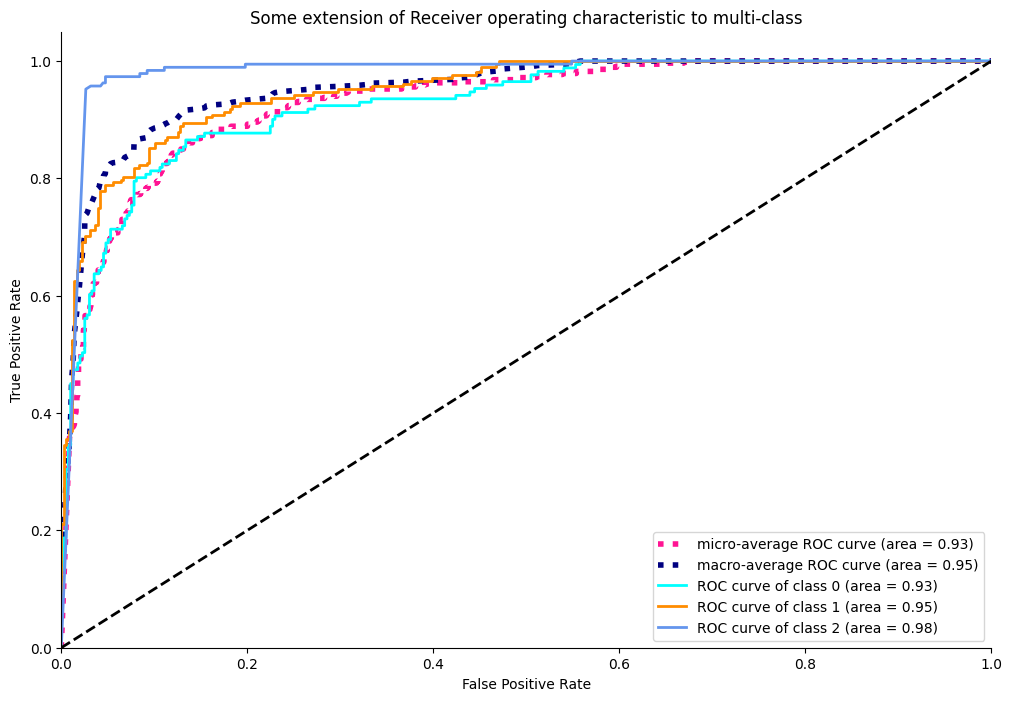

In [27]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_test = np.array(y_test)

n_classes = 3

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

preparing test data


In [28]:
import os
import cv2
import numpy as np
from PIL import Image

data = []
labels = []

# Define directories
directories = [
    ("/content/drive/MyDrive/skin_cancer_dataset/bcc/test", 0),
    ("/content/drive/MyDrive/skin_cancer_dataset/melanoma/test", 1),
    ("/content/drive/MyDrive/skin_cancer_dataset/nv/test", 2)
]

for directory, label in directories:
    images = os.listdir(directory)
    for image_filename in images:
        try:
            image_path = os.path.join(directory, image_filename)
            image = cv2.imread(image_path)
            image_from_array = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            size_image = image_from_array.resize((224, 224))
            data.append(np.array(size_image))
            labels.append(label)
        except Exception as e:
            print(f"Error processing image {image_filename}: {e}")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (237, 224, 224, 3)
Labels shape: (237,)


In [29]:
feats_test = np.array(data)
labels_test = np.array(labels)

np.save("/content/drive/MyDrive/skin_cancer_dataset/feats_test",feats_test)
np.save("/content/drive/MyDrive/skin_cancer_dataset/labels_test",labels_test)



In [30]:
feats_test=np.load("/content/drive/My Drive/skin_cancer_dataset/feats_test.npy")
labels_test=np.load("/content/drive/My Drive/skin_cancer_dataset/labels_test.npy")

num_classes=len(np.unique(labels_test))
len_data=len(feats_test)
print(len_data)

237


In [31]:
x_valid = feats_test.astype('float32')/255
y_valid=to_categorical(labels_test,3)

24/24 [==============================] - 0s 14ms/step


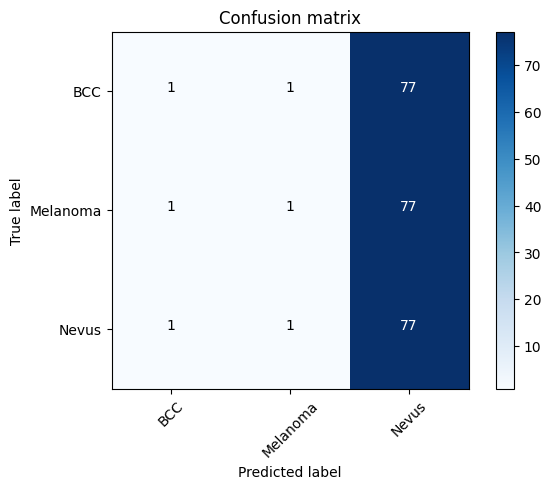

In [32]:
pred_Y = model.predict(x_valid, batch_size = 10, verbose = True)
rounded_predictions = model.predict(x_valid, batch_size=16, verbose=0)
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_valid, axis=1)
BS=10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['BCC','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_valid, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_valid, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [33]:
img1 = "/content/drive/MyDrive/skin_cancer_dataset/nv/test/ISIC_0030463.jpg"
img2 ="/content/drive/MyDrive/skin_cancer_dataset/melanoma/test/ISIC_0030484.jpg"
img3 = "/content/drive/MyDrive/skin_cancer_dataset/bcc/test/ISIC_0030492.jpg"

In [34]:
class_dict ={"Basal_Cell_Carcinoma":0,
             "Melanoma":1,
             "Nevus":2}

In [35]:
from IPython.display import display
from PIL import Image
import numpy as np

def pred_image(img_path, model):
    img = Image.open(img_path).resize((224, 224))  # target_size must agree with what the trained model expects!!

    # Preprocessing the image
    img_array = np.asarray(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255

    preds = model.predict(img_array)
    pred = np.argmax(preds, axis=1)
    pred_cat = [k for k, v in class_dict.items() if v == pred[0]][0]

    return pred_cat

# Assuming you have a dictionary called class_dict mapping class indices to class names
class_dict ={"Basal_Cell_Carcinoma":0,
             "Melanoma":1,
             "Nevus":2}



In [36]:
pred_image(img1,model)

1/1 [==============================] - 1s 735ms/step


'Nevus'

In [37]:
pred_image(img2,model)

1/1 [==============================] - 0s 26ms/step


'Nevus'

In [38]:
pred_image(img3,model)

1/1 [==============================] - 0s 26ms/step


'Nevus'

In [39]:
from tensorflow.keras.preprocessing import image
img_path='/content/drive/MyDrive/skin_cancer_dataset/melanoma/test/ISIC_0030484.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [40]:
import tensorflow as tf
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [41]:
# Prepare image
img_size=(224,224)
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
img_path='/content/drive/MyDrive/skin_cancer_dataset/melanoma/test/ISIC_0030484.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img)

1/1 [==============================] - 0s 25ms/step


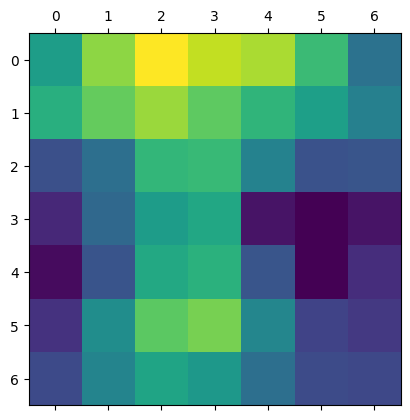

In [42]:
# Generate class activation heatmap
last_conv_layer_name = "block_16_depthwise"
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-43-e38bf7fe0ed6>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


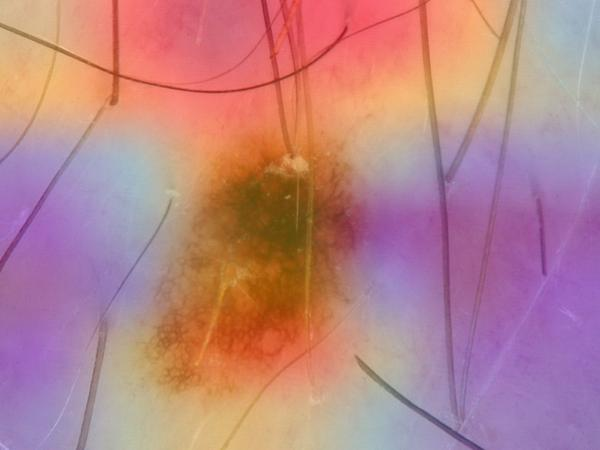

In [43]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image as im
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
img_path='/content/drive/MyDrive/skin_cancer_dataset/melanoma/test/ISIC_0030484.jpg'
def save_and_display_gradcam(img_path, heatmap, cam_path="/content/drive/MyDrive/skin_cancer_dataset/cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    # img = im.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

    # # Preprocessing the image
    # img = im.img_to_array(img)
    # img = np.expand_dims(img, axis=0)
    # img = img.astype('float32')/255

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

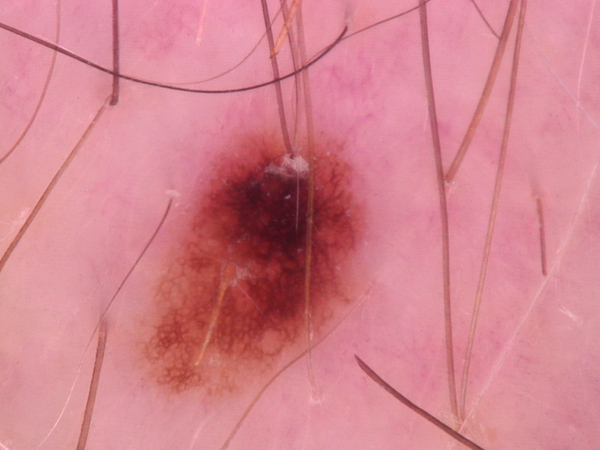

In [ ]:
display(Image(img_path))

In [44]:
layer_names=[layer.name for layer in model.layers]

In [45]:
layer_names

['input_1',
 'Conv1',
 'bn_Conv1',
 'Conv1_relu',
 'expanded_conv_depthwise',
 'expanded_conv_depthwise_BN',
 'expanded_conv_depthwise_relu',
 'expanded_conv_project',
 'expanded_conv_project_BN',
 'block_1_expand',
 'block_1_expand_BN',
 'block_1_expand_relu',
 'block_1_pad',
 'block_1_depthwise',
 'block_1_depthwise_BN',
 'block_1_depthwise_relu',
 'block_1_project',
 'block_1_project_BN',
 'block_2_expand',
 'block_2_expand_BN',
 'block_2_expand_relu',
 'block_2_depthwise',
 'block_2_depthwise_BN',
 'block_2_depthwise_relu',
 'block_2_project',
 'block_2_project_BN',
 'block_2_add',
 'block_3_expand',
 'block_3_expand_BN',
 'block_3_expand_relu',
 'block_3_pad',
 'block_3_depthwise',
 'block_3_depthwise_BN',
 'block_3_depthwise_relu',
 'block_3_project',
 'block_3_project_BN',
 'block_4_expand',
 'block_4_expand_BN',
 'block_4_expand_relu',
 'block_4_depthwise',
 'block_4_depthwise_BN',
 'block_4_depthwise_relu',
 'block_4_project',
 'block_4_project_BN',
 'block_4_add',
 'block_5_e